### Load data

In [5]:
import numpy as np
data = np.load("mds-population.npz")
dist = data["D"]
population_list = data["population_list"]
print(dist)
print(dist.shape)
print(population_list)
print(population_list.shape)

[[  0.  87.  12. ... 462. 559. 553.]
 [ 87.   0.  87. ... 210. 359. 285.]
 [ 12.  87.   0. ... 317. 401. 377.]
 ...
 [462. 210. 317. ...   0. 226. 173.]
 [559. 359. 401. ... 226.   0. 127.]
 [553. 285. 377. ... 173. 127.   0.]]
(42, 42)
[b'Bantu' b'E. Afncan' b'Nilo-Saharan' b'W. African' b'San' b'Barter'
 b'Mbuti' b'Indian' b'Iranian' b'Near Eastern' b'Uralic' b'Ainu'
 b'Japanese' b'Korean' b'Mon Khmer' b'Thai' b'Dravidian' b'Mongol Tungus'
 b'Tibetan' b'Indonesian' b'Malaysian' b'Filipino' b'N. Turkic'
 b'S. Chinese' b'Basque' b'Lapp' b'Sardinian' b'Danish' b'English'
 b'Greek' b'Italian' b'C Amerind' b'Eskimo' b'Na-Dene' b'N. American'
 b'S. American' b'Chukchi' b'Melanesian' b'Micronesian' b'Polynesian'
 b'New Guinean' b'Australian']
(42,)


### MDS and 2D embedding

In [7]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(dist)
print(X_transformed)

[[ 159.62183772 -307.66819996]
 [  69.9177718  -114.38242003]
 [ 109.22385446 -194.74636546]
 [ 150.02842957 -199.95980914]
 [  49.11355078 -144.23920565]
 [   2.75284377  -68.37170144]
 [ 187.23987176 -269.40443726]
 [ -66.94078526  -23.27422079]
 [ -78.55445004  -58.97331621]
 [ -32.87651232  -59.67330369]
 [  -9.06165063   38.37453573]
 [ -38.23817777   99.9286211 ]
 [ -22.62850541  116.44233883]
 [ -20.65836608   81.3819952 ]
 [  82.46365785   39.42888674]
 [  79.45091657  115.81366972]
 [ -47.5592133   -18.62378721]
 [  -4.26106638   24.74957007]
 [ -24.95974487   33.43473244]
 [ 106.04049496   49.30442437]
 [ 125.78914665    9.44086309]
 [  78.39400368   89.66818128]
 [ -56.48111581   33.33518222]
 [  53.29822202   84.25790586]
 [ -54.34057616 -110.31619444]
 [ -43.81636833  -41.90166497]
 [-101.9272848   -87.61463637]
 [ -57.74953962  -82.35748168]
 [ -69.08450039  -84.61910156]
 [ -32.15565418  -66.78189755]
 [-108.47792562  -78.10856115]
 [-101.13219823   72.86181172]
 [-129.1

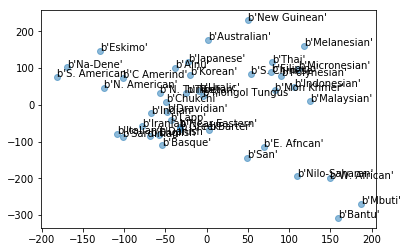

In [14]:
import matplotlib.pyplot as plt

x = X_transformed[:, 0]
y = X_transformed[:, 1]
# print(x, y)
plt.scatter(x, y, alpha=0.5)
for i, txt in enumerate(population_list):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

# assumptions: if default dissimilarity measurement (euclidean), 
# it supposes that the distance are calculated with euclidean distance
# but here we use precomputed dissimilarity which is directly passed to fit_transform function

### Finding appropriate N for ND embedding

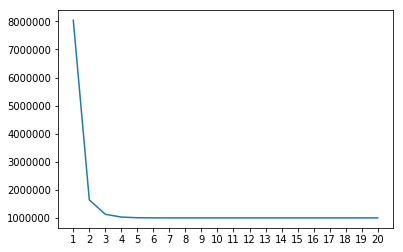

In [16]:
stresses = [float('Inf')]
for m in range(1, 21):
    embedding = MDS(n_components=m, dissimilarity='precomputed')
    embedding.fit_transform(dist)
    stresses.append(embedding.stress_)
plt.xticks(np.arange(1,21,step=1))    
plt.plot(stresses)

# dimension = 3 or 4 should be good enough

### K-means on 2D embedding

0
[b'Uralic' b'Ainu' b'Japanese' b'Korean' b'Mongol Tungus' b'Tibetan'
 b'N. Turkic' b'C Amerind' b'Eskimo' b'Na-Dene' b'N. American'
 b'S. American' b'Chukchi']
1
[b'Bantu' b'E. Afncan' b'Nilo-Saharan' b'W. African' b'San' b'Mbuti']
2
[b'Mon Khmer' b'Thai' b'Indonesian' b'Malaysian' b'Filipino' b'S. Chinese'
 b'Melanesian' b'Micronesian' b'Polynesian' b'New Guinean' b'Australian']
3
[b'Barter' b'Indian' b'Iranian' b'Near Eastern' b'Dravidian' b'Basque'
 b'Lapp' b'Sardinian' b'Danish' b'English' b'Greek' b'Italian']


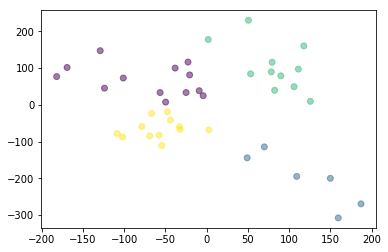

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_transformed)
for i in range(4):
    print(i)
    print(population_list[np.where(kmeans.labels_ == i)])
plt.scatter(x, y, alpha=0.5, c=kmeans.labels_)
plt.show()

# k is decided based on the observation from last scatter plot

# agree with the result
# what might be lost?
# although the genetic distance does not necessarily align with the actual geographic distance,
# we can anticipate population within neighbouring geographic regions might have smaller genetic distance
# so the scatter losses the rotation, reflextion but only preserves the relative positions between the points.
# (but it's not the problem with kmeans tho.... it's the drawback of mds lol)
# (well the kmeans is carried out on the mds, i guess the above reasoning should be correct)

### Hierarchical clustering 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


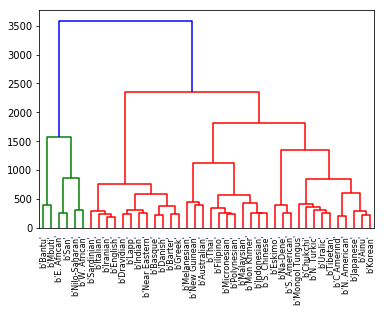

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(dist, 'ward')
dendrogram(Z, labels = population_list)
plt.show()

In [ ]:
import scipy.spatial.distance as ssd
# convert the redundant n*n square matrix form into a condensed nC2 array
    distArray = ssd.squareform(distMatrix) 
    # distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j

0
[b'Bantu' b'E. Afncan' b'Nilo-Saharan' b'W. African' b'San' b'Mbuti']
1
[b'Barter' b'Indian' b'Iranian' b'Near Eastern' b'Dravidian' b'Basque'
 b'Lapp' b'Sardinian' b'Danish' b'English' b'Greek' b'Italian']
2
[b'Mon Khmer' b'Thai' b'Indonesian' b'Malaysian' b'Filipino' b'S. Chinese'
 b'Melanesian' b'Micronesian' b'Polynesian' b'New Guinean' b'Australian']
3
[b'Uralic' b'Ainu' b'Japanese' b'Korean' b'Mongol Tungus' b'Tibetan'
 b'N. Turkic' b'C Amerind' b'Eskimo' b'Na-Dene' b'N. American'
 b'S. American' b'Chukchi']


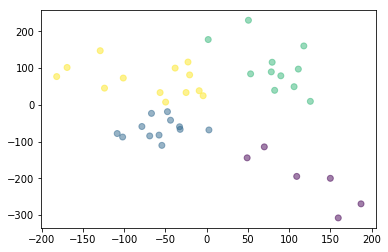

In [29]:
fc = fcluster(Z, 4, criterion='maxclust')
for i in range(4):
    print(i)
    print(population_list[np.where(fc == i+1)])
plt.scatter(x, y, alpha=0.5, c=fc)
plt.show()

# difference?

### K-medoids

medoids:
[ 2 29 23 17]

clustering result:
0
b'Bantu'
b'E. Afncan'
b'Nilo-Saharan'
b'W. African'
b'San'
b'Mbuti'
1
b'Barter'
b'Indian'
b'Iranian'
b'Near Eastern'
b'Basque'
b'Lapp'
b'Sardinian'
b'Danish'
b'English'
b'Greek'
b'Italian'
2
b'Mon Khmer'
b'Thai'
b'Indonesian'
b'Malaysian'
b'Filipino'
b'S. Chinese'
b'Melanesian'
b'Micronesian'
b'Polynesian'
3
b'Uralic'
b'Ainu'
b'Japanese'
b'Korean'
b'Dravidian'
b'Mongol Tungus'
b'Tibetan'
b'N. Turkic'
b'C Amerind'
b'Eskimo'
b'Na-Dene'
b'N. American'
b'S. American'
b'Chukchi'
b'New Guinean'
b'Australian'
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 3. 3. 3. 3. 2. 2. 3. 3. 3. 2. 2. 2. 3. 2.
 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 3. 3. 3. 2. 2. 2. 3. 3.]


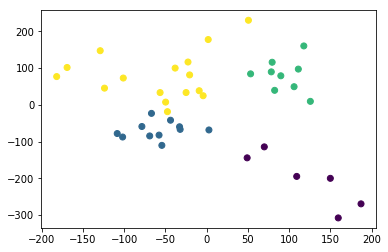

In [42]:
# The Python implementation of k-medoids. https://github.com/letiantian/kmedoids/blob/master/kmedoids.py
# Bauckhage C. Numpy/scipy Recipes for Data Science: k-Medoids Clustering[R]. Technical Report, University of Bonn, 2015.

import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C




M, C = kMedoids(dist, 4)

print('medoids:')
# for point_idx in M:
#     print( data[point_idx] )
print(M)
print('')


kmedoids_labels = np.zeros(len(dist))
print('clustering result:')
for label in C:
    print(label)
    for point_idx in C[label]:
        kmedoids_labels[point_idx] = label
        print(population_list[point_idx])
print(kmedoids_labels)


plt.scatter(x, y, c=kmedoids_labels)

In [ ]:
# with k-medoids, the clusters are different every time
# because the medoids are randomly initialized
# whereas in k-means or hierarchical k-means, 
# centroids are averaged from the clusters, which will always converge to the same result

# plot on mds x and y?
# have to, otherwise can only cluster but cannot plot in 2d

